# Описание проекта:

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных:**

* `children` — количество детей в семье
* `days_employed` — общий трудовой стаж в днях
* `dob_years` — возраст клиента в годах
* `education` — уровень образования клиента
* `education_id` — идентификатор уровня образования
* `family_status` — семейное положение
* `family_status_id` — идентификатор семейного положения
* `gender` — пол клиента
* `income_type` — тип занятости
* `debt` — имел ли задолженность по возврату кредитов
* `total_income` — ежемесячный доход
* `purpose` — цель получения кредита

# Обзор данных:

 Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**
`/datasets/data.csv`

In [27]:
import pandas as pd
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Выведем первые 20 строчек датафрейма `data` на экран:

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода `info()`:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# Предобработка данных:

## Удаление пропусков

Выведем количество пропущенных значений для каждого столбца. Используем комбинацию двух методов:

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

## Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработаем значения в этом столбце: заменим все отрицательные значения положительными с помощью метода `abs()`:

In [7]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях:

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится для исследования.

Выведем перечень уникальных значений столбца `children`:

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`:

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены:

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`:

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. Проверим себя и ещё раз выведем количество пропущенных значений для каждого столбца с помощью двух методов:

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

## Изменение типов данных:

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`:

In [14]:
data['total_income'] = data['total_income'].astype(int)

## Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. Проверим остальные столбцы:

In [15]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их:

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

## Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`:

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследуем данные и ответьтим на вопросы:

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [24]:
def quantity_children(children):
    if children == 0:
        return 'Нет детей'
    elif children == 1:
        return 'Один ребенок'
    elif children == 2:
        return 'Два ребенка'
    elif children == 3:
        return 'Три ребенка'
    elif children == 4:
        return 'Четыре ребенка'
    elif children == 5:
        return 'Пять детей'
    
data['Количество детей:'] = data['children'].apply(quantity_children)
children_debt_dependence = data.pivot_table(index = ['Количество детей:'], values = 'debt', aggfunc = ['count', 'sum', 'mean']) # создадим сводную таблицу, сгруппируем по количеству детей и вычислим: всего кредитополучателей, всего должников и долю должников
children_debt_dependence = children_debt_dependence.rename({'count': 'Всего кредитополучателей', 'sum': 'Всего должников', 'mean': 'Доля должников'}, axis = 'columns') # переименуем столбцы
children_debt_dependence.columns = ['Всего кредитополучателей', 'Количество должников', 'Доля должников'] # уберем мультииндекс в назвниях столбцов (слово debt)
display(children_debt_dependence) # выведем датафрейм на экран

,Всего кредитополучателей,Количество должников,Доля должников
Количество детей:,,,
Два ребенка,2052,194,0.094542
Нет детей,14091,1063,0.075438
Один ребенок,4808,444,0.092346
Пять детей,9,0,0.000000
Три ребенка,330,27,0.081818
Четыре ребенка,41,4,0.097561


**Вывод:** 
сгруппировав людей по количеству детей, и найдя количество людей, которые имели задолженности по возврату кредита, то можно заметить, что больше всего людей, которые не возвращали кредит в срок, у которых нет детей (таких людей и большинство). И с увеличением количества детей, количество не выплаченных кредитов в срок убывает. Это логично, так как чем больше у человека детей, тем меньше таких людей. Из данных можно сделать вывод, что есть зависимость между количеством детей и возвратом кредита в срок. Больше всего просрочек у людей с одним, двумя, тремя и четырьмя детьми. Нет просрочек у людей, у которых 5 детей, это скорее всего связано с тем, что крайне маленькая выборка (всего 9). И в итоге меньше всего просрочек у людей, у кого совсем нет детей.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
family_debt_dependence = data.pivot_table(index = ['family_status'], values = 'debt', aggfunc = ['count', 'sum', 'mean']) # создадим сводную таблицу, сгруппируем по семейному положению и вычислим: всего кредитополучателей, всего должников и долю должников
family_debt_dependence = family_debt_dependence.rename({'count': 'Всего кредитополучателей', 'sum': 'Всего должников', 'mean': 'Доля должников'}, axis = 'columns') # переименуем столбцы
family_debt_dependence.columns = ['Всего кредитополучателей', 'Количество должников', 'Доля должников'] # уберем мультииндекс в назвниях столбцов (слово debt)
display(family_debt_dependence) # выведем датафрейм на экран

,Всего кредитополучателей,Количество должников,Доля должников
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


**Вывод:** на основании полученных данных, можно сделать вывод, что существует прямая зависимость между семейным положением, и возвратом кредита в срок. Больше всего просрочек по кредиту у людей не "женат/не замужем", скорее всего это связано с тем, что либо человек еще молодой и соответственно, не может брать ответственность за свои поступки, либо нет желания брать ответственность за свои поступки. Тоже самое касается категории "гражданский брак". Люди из данных категорий, скорее всего, берут кредит для своих нужд, и так как нет ответственности перед семьей, то и не торопятся возвращать кредит вовремя. Категория "вдовец/вдова" самая ответственная (больше всего возвратов кредитов в срок). Это связано, скорее всего, с тем, что имеют большую зону ответственности, накопленную с возрастом. Категории: "в разводе" и "женат/замужем" имеют близкие значения возврата кредита в срок, и являются средним значением.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [26]:
def income_level(income):
    if income == 'E' or income == 'D' or income == 'C':
        return 'Средний доход и низкий доход, ниже 200000 рублей'
    elif income == 'B' or income == 'A':
        return 'Высокий доход, выше 200001 рублей'

data['Уровень дохода:'] = data['total_income_category'].apply(income_level)
income_debt_dependence = data.pivot_table(index = ['Уровень дохода:'], values = 'debt', aggfunc = ['count', 'sum', 'mean']) # создадим сводную таблицу, сгруппируем по уровню дохода и вычислим: всего кредитополучателей, всего должников и долю должников
income_debt_dependence = income_debt_dependence.rename({'count': 'Всего кредитополучателей', 'sum': 'Всего должников', 'mean': 'Доля должников'}, axis = 'columns') # переименуем столбцы
income_debt_dependence.columns = ['Всего кредитополучателей', 'Количество должников', 'Доля должников'] # уберем мультииндекс в назвниях столбцов (слово debt)
display(income_debt_dependence) # выведем датафрейм на экран

,Всего кредитополучателей,Количество должников,Доля должников
Уровень дохода:,,,
"Высокий доход, выше 200001 рублей",5039,356,0.070649
"Средний доход и низкий доход, ниже 200000 рублей",16292,1376,0.084459


Построим график с отсечками погрешностей:

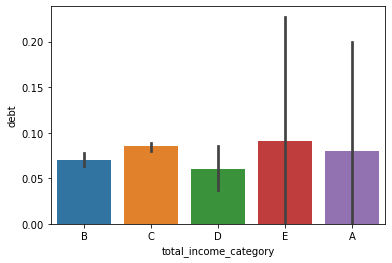

In [28]:
sns.barplot(data = data, x = 'total_income_category', y = 'debt');

Обратим внимание, чем больше данных мы имеем, тем точнее мы получим значение среднего. Мы видим, что у категории D погрешность сравнима с самим значением. А данных по категориям А и Е еще меньше.

**Вывод:** так как около 98% всех клиентов принадлежат категориям B (доход от 200001 до 1000000 рублей) и C (доход от 50001 до 200000 рублей), то принято решение сгруппировать клиентов на две категории: доход до 200000 и выше 200001 рублей. Благодаря этому решению, будет возможно сделать корректные выводы и статпогрешность будет маленькая. На основе полученных значений можно сделать следующие выводы, что доля должников меньше у людей с высоким доходом. Это, скорее всего, связано с тем, что люди с более высоким доходом понимают ценность денег, отдают отчет своим поступкам, и берут кредит только в экстренных случаях, при этом имея план выплаты кредитов, что и понижает долю должников в данной категории. А люди, имеющие более низких доход, не имея возможности что-то купить в обозримом будущем, берут необдуманный кредит. Что и приводит к большой доле невыплаченных кредитов вовремя в данной категории.

### Как разные цели кредита влияют на его возврат в срок?

In [29]:
purpose_debt_dependence = data.pivot_table(index = ['purpose_category'], values = 'debt', aggfunc = ['count', 'sum', 'mean']) # создадим сводную таблицу, сгруппируем по целям кредита и вычислим: всего кредитополучателей, всего должников и долю должников
purpose_debt_dependence = purpose_debt_dependence.rename({'count': 'Всего кредитополучателей', 'sum': 'Всего должников', 'mean': 'Доля должников'}, axis = 'columns') # переименуем столбцы
purpose_debt_dependence.columns = ['Всего кредитополучателей', 'Количество должников', 'Доля должников'] # уберем мультииндекс в назвниях столбцов (слово debt)
display(purpose_debt_dependence) # выведем датафрейм на экран

,Всего кредитополучателей,Количество должников,Доля должников
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


**Вывод:** на основании полученных данных, можно сделать вывод, что наибольшее значение просрочек по кредиту, это из категории "операции с автомобилем". Я считаю, что это связано с тем, что автомобиль требует обслуживания, и еще может случиться авария, и тогда человеку приходиться тратить деньги, как на ремонт автомобиля, так и погашение кредита, что является сложной задачей, и требует большого дохода. Также крайне большое значение не возвращенных кредитов, взятых на категорию: "получение образования". Это связано с тем, что чаще всего кредит берется на обучение в университете, и много людей выбирают не то направление, которое им нравиться, либо их отчисляют из ВУЗа. И в том и в другом случае, с психологической точки зрения сложно выплачивать кредит вовремя. А наименьшее значение, невыплаченных кредитов в срок, это из категории: "операции с недвижимостью". Предполагаю, что чаще всего берется ипотека на недвижимость, и люди понимают, что если не будут выплачивать средства, то у них банк просто заберет данную недвижимость, осознавая это – люди стремятся вовремя платить по кредиту. У категории "проведение свадьбы", довольно высокая доля выплаченных кредитов в срок. Я считаю, так как в большинстве случаев свадьба это заблаговременно обдуманный и спланированный шаг, и соответственно люди готовы к выплате по кредиту.

### Приведем возможные причины появления пропусков в исходных данных:

*Ответ:* Возможные причины появления пропусков в исходных данных:
клиент может искажать или скрывать информацию о себе;
человеческий фактор, работник вводящий данные клиента допускает ошибку;
поломка оборудования, приводящая к частичной потере данных (маловероятная причина, но возможная);
невозможность получения данных, или их обработки;
неправильная загрузка или выгрузка данных;
неправильный запрос, объединение таблиц.

### Объясним, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных:

*Ответ:* медиана является характеристикой менее зависимой к случайным выбросам, т.е. к появлению в данных аномально больших или маленьких значений. Например, если считать среднее арифметическую зарплату по отделу, где всего 5 сотрудников и начальник отдела. И допустим у сотрудников зарплата в пределах от 80000 до 120000 рублей. А у начальника отдела 300000 рублей зарплата. То средняя зарплата будет равна приблизительно 133000 рублей. Что больше любой зарплаты сотрудника. А если посчитаем медиану, то она будет равна 105000 рублей. Также будет возникать, если у кого-то будет слишком маленькая зарплата. Вывод: для заполнения пропусков в количественных переменных, лучше использовать медиану, чем среднее арифметическое или моду. Так как медиана наименее подвержена к выбросам в значениях.

## Общий вывод:

В ходе работы были определена зависимость между различными категориями людей и возвратом их кредита в срок.
На основе полученных результатов, можно сделать вывод, что предоставлять кредит лучше всего клиентам, имеющие следующие категории:
заемщик не имеет детей;
семейное положение вдовец/вдова;
доход, чем выше, тем лучше;
а цель кредита - это "операции с недвижимостью".
Исходя из данных, заемщики, относящиеся к данным категориям, выплатят кредит вовремя с наибольшей вероятностью. 
И необходимо более детально изучать заемщика и его входные данные, если заемщик берет кредит на автомобиль или образование. Так как доля просрочек по кредиту на данные цели самая высокая. 
Наиболее надежный портрет клиента следующий: клиент, который берут ипотеку, с заработкам выше среднего(чем выше заработок, тем лучше), не имеющий детей, состоящий в официальном браке (лучше вдовец или вдова).
А если описать портрет, наоборот, наиболее рискованного клиента, то он будет следующим: клиент имеет двоих или более детей, не женат/не замужем или находиться в гражданском браке, имеет доход ниже среднего или средний, а цель кредита получение образования или операции с автомобилем. По данным категориям хорошо подходят молодые люди, которые берут кредит на автомобиль или образование, и я являются не благонадежными клиентами. 